In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# to do that we should first find the columns of the table:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


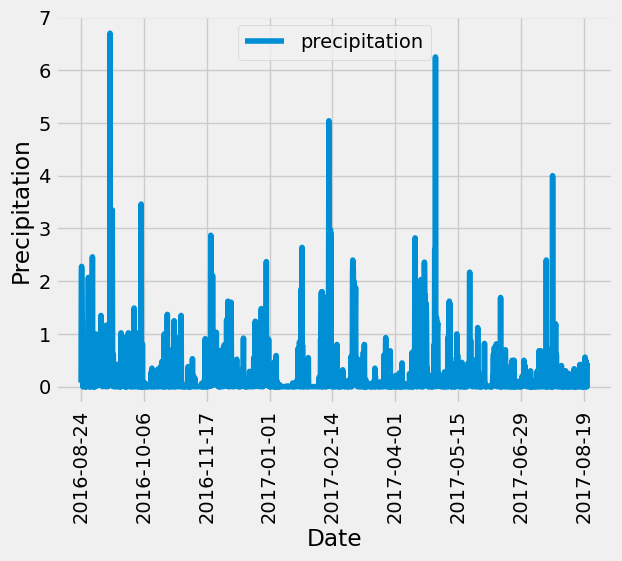

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(recent_date)
# Calculate the date one year from the last date in data set.

last_year = (dt.datetime.strptime(last_date[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
#print(last_year)
# Perform a query to retrieve the data and precipitation scores

precipt_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipt_df = pd.DataFrame(precipt_data).set_index('date')
precipt_df=precipt_df.rename(columns={'prcp':'precipitation'})

# Use Pandas Plotting with Matplotlib to plot the data
precipt_df=precipt_df.sort_values(by='date').dropna()
precipt_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(Station.id)).all()
total_station

[(9,)]

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations =  session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
temperature = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
temperature

(54.0, 85.0, 71.66378066378067)

<AxesSubplot:ylabel='Frequency'>

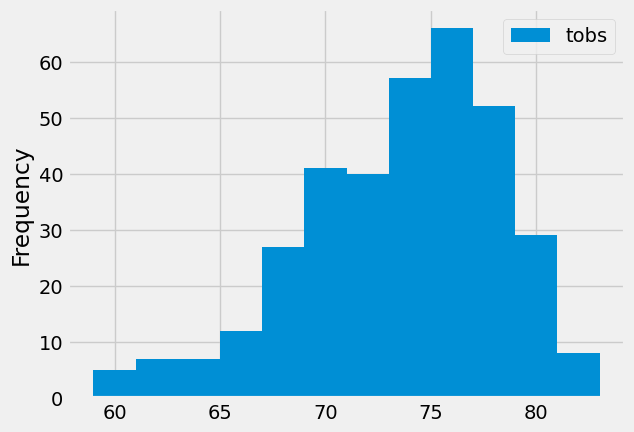

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_highest_obs = active_stations[0][0]
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-24").filter(Measurement.date <= "2017-08-23").filter(Measurement.station == station_highest_obs).all()
results_df = pd.DataFrame(results)
results_df.plot.hist(bins=12)

# Close Session

In [54]:
# Close Session
session.close()